In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
%matplotlib inline

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('/Users/pradeep/Desktop/DSI/Project/DiseaseFeatureClassifiers/data/Training.csv')

data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [5]:
print(data.isnull().sum().sum())  # Should be 0

0


In [6]:
print("Number of symptoms:", data.shape[1] - 1)

Number of symptoms: 132


In [7]:
print("Number of unique diseases:", data['prognosis'].nunique())

Number of unique diseases: 41


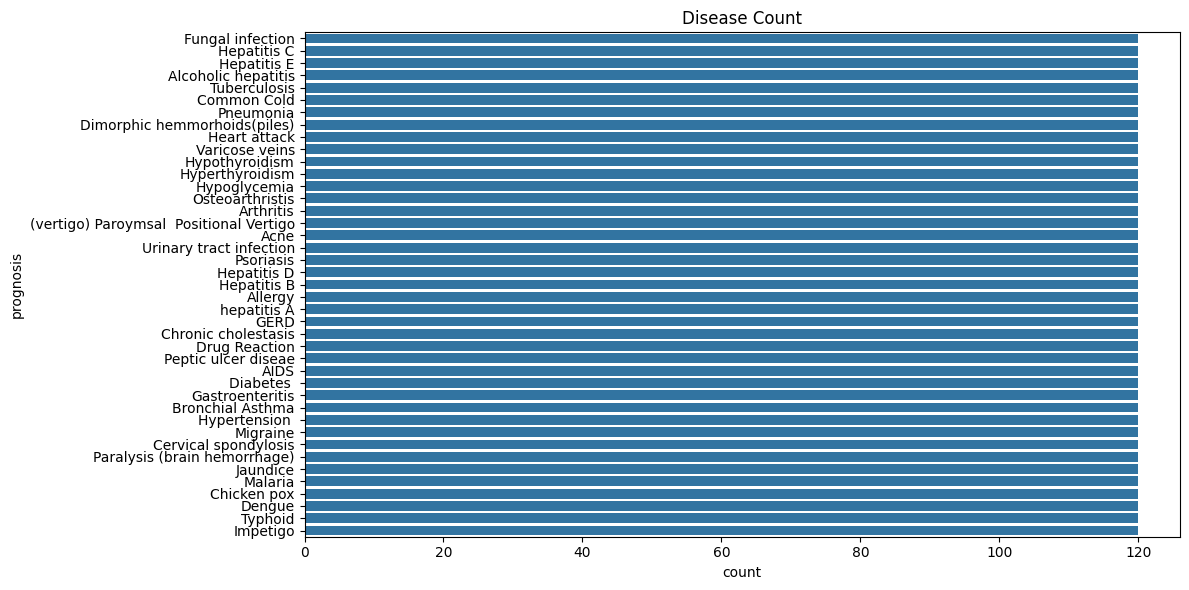

In [8]:
# Plot number of cases per disease
plt.figure(figsize=(12,6))
sns.countplot(y='prognosis', data=data, order=data['prognosis'].value_counts().index)
plt.title("Disease Count")
plt.tight_layout()
plt.show()

In [10]:
# Separate features and labels
X = data.drop('prognosis', axis=1)
y = data['prognosis']

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [22]:
svm_preds = svm_model.predict(X_test_scaled)

In [23]:
accuracy = accuracy_score(y_test, svm_preds)

print(f"SVM Test Accuracy: {accuracy * 100:.2f}%")

SVM Test Accuracy: 100.00%


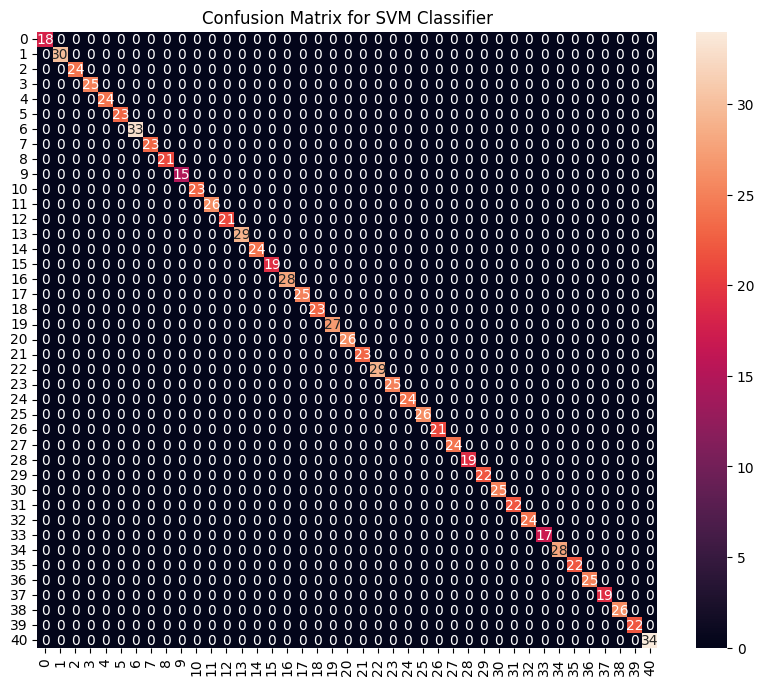

SVM Accuracy: 100.00%


In [24]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

cf_matrix_svm = confusion_matrix(y_test, svm_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_svm, annot=True, fmt="d")
plt.title("Confusion Matrix for SVM Classifier")
plt.show()

print(f"SVM Accuracy: {accuracy_score(y_test, svm_preds) * 100:.2f}%")